In [93]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from keras.layers import Dense, Flatten, AveragePooling2D, Dropout
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam

In [94]:
pwd

'/kaggle/working'

In [95]:
data_path = "/kaggle/input/pothole-and-plain-rode-images/My Dataset/"

In [96]:
# Check images
img = cv2.imread(data_path+"train"+'/'+"Pothole"+"/"+"1.jpg")

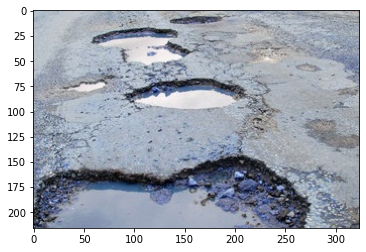

In [97]:
# pothole 
plt.imshow(img)

In [98]:
img.shape

(216, 324, 3)

In [99]:
# Data agumentation on train and test

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   zoom_range = 0.2,
                                   rotation_range=15,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [100]:
# create dataset train
training_set = train_datagen.flow_from_directory(data_path + 'train',
                                                 target_size = (300, 300),
                                                 batch_size = 16,
                                                 class_mode = 'categorical',
                                                 shuffle=True)

Found 723 images belonging to 2 classes.


In [101]:
# Create test data set
test_set = test_datagen.flow_from_directory(data_path + 'test',
                                            target_size = (300, 300),
                                            batch_size = 16,
                                            class_mode = 'categorical',
                                            shuffle = False)

Found 16 images belonging to 2 classes.


In [102]:
# Model creation with changes

model = VGG16(input_shape=(300,300,3),include_top=False)

for layer in model.layers:
    layer.trainable = False

newModel = model.output
newModel = AveragePooling2D()(newModel)
newModel = Flatten()(newModel)
newModel = Dense(128, activation="relu")(newModel)
newModel = Dropout(0.5)(newModel)
newModel = Dense(2, activation='softmax')(newModel)

model = Model(inputs=model.input, outputs=newModel)

In [103]:
model.summary()

Model: "functional_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 300, 300, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 300, 300, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 300, 300, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 150, 150, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 150, 150, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 150, 150, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 75, 75, 128)      

In [104]:
opt=Adam(learning_rate=0.0001)
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])

In [105]:
history = model.fit_generator(training_set,
                              validation_data=test_set,
                              epochs=10)    

Epoch 1/10
46/46 [==============================] - 32s 706ms/step - loss: 0.4418 - accuracy: 0.8147 - val_loss: 0.4512 - val_accuracy: 0.8125
Epoch 2/10
46/46 [==============================] - 31s 677ms/step - loss: 0.1912 - accuracy: 0.9433 - val_loss: 0.4135 - val_accuracy: 0.8750
Epoch 3/10
46/46 [==============================] - 32s 696ms/step - loss: 0.1666 - accuracy: 0.9405 - val_loss: 0.4113 - val_accuracy: 0.8750
Epoch 4/10
46/46 [==============================] - 31s 673ms/step - loss: 0.1265 - accuracy: 0.9571 - val_loss: 0.3899 - val_accuracy: 0.8750
Epoch 5/10
46/46 [==============================] - 32s 704ms/step - loss: 0.1167 - accuracy: 0.9640 - val_loss: 0.4369 - val_accuracy: 0.8125
Epoch 6/10
46/46 [==============================] - 32s 690ms/step - loss: 0.1095 - accuracy: 0.9627 - val_loss: 0.4019 - val_accuracy: 0.8750
Epoch 7/10
46/46 [==============================] - 32s 702ms/step - loss: 0.0816 - accuracy: 0.9723 - val_loss: 0.4516 - val_accuracy: 0.8125

In [106]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs=range(len(acc))

Text(0.5, 1.0, 'Training and Validation Accuracy')

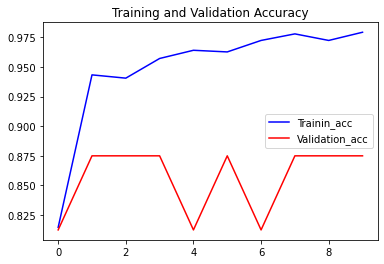

In [107]:
plt.plot(epochs,acc,label='Trainin_acc',color='blue')
plt.plot(epochs,val_acc,label='Validation_acc',color='red')
plt.legend()
plt.title("Training and Validation Accuracy")

Text(0.5, 1.0, 'Training and Validation loss')

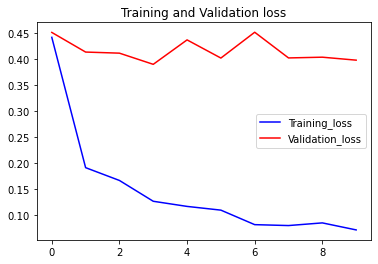

In [108]:
plt.plot(epochs,loss,label='Training_loss',color='blue')
plt.plot(epochs,val_loss,label='Validation_loss',color='red')
plt.legend()
plt.title("Training and Validation loss")

In [109]:
class_dict = {0:'Plain',
              1:'Pothole'}

prediction class:  Plain


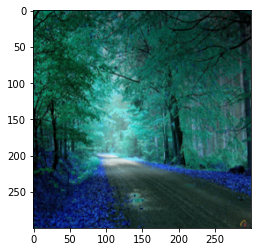

In [122]:
# New Data for testing 

file_path =  '/kaggle//input/test-pothole/plain3.png'
test_image = cv2.imread(file_path)
test_image = cv2.resize(test_image, (300,300),interpolation=cv2.INTER_CUBIC)
plt.imshow(test_image)
test_image = np.expand_dims(test_image,axis=0)
probs = model.predict(test_image)
pred_class = np.argmax(probs)

pred_class = class_dict[pred_class]

print('prediction class: ',pred_class)

prediction class:  Pothole


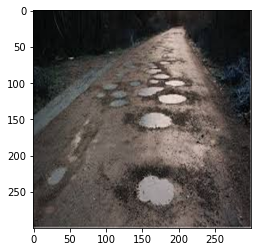

In [124]:
# New Data for testing 

file_path =  '/kaggle//input/test-pothole/pothole3.jfif'
test_image = cv2.imread(file_path)
test_image = cv2.resize(test_image, (300,300),interpolation=cv2.INTER_CUBIC)
plt.imshow(test_image)
test_image = np.expand_dims(test_image,axis=0)
probs = model.predict(test_image)
pred_class = np.argmax(probs)

pred_class = class_dict[pred_class]

print('prediction class: ',pred_class)

# Thank You